<a href="https://colab.research.google.com/github/helmaft/Lung-Cancer/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
import plotly.figure_factory as ff
import plotly.subplots as sp
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pearsonr
from scipy.stats import ttest_ind, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Lung Cancer/cancer patient data sets.csv')

**Data Cleaning**

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [6]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Patient Id,P1,P10,P100,P1000,P101
Age,33,17,35,37,46
Gender,1,1,1,1,1
Air Pollution,2,3,4,7,6
Alcohol use,4,1,5,7,8
Dust Allergy,5,5,6,7,7
OccuPational Hazards,4,3,5,7,7
Genetic Risk,3,4,5,6,7
chronic Lung Disease,2,2,4,7,6


In [8]:
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(mapping, inplace=True)

In [9]:
mapping = {1: 'Male', 2: 'Female'}
df["Gender"].replace(mapping, inplace=True)

In [10]:
df.groupby('Gender').describe()

index                                                             \
        count        mean         std  min     25%    50%     75%    max   
Gender                                                                     
Female  402.0  490.437811  299.456586  6.0  219.25  493.5  749.75  998.0   
Male    598.0  505.591973  281.532866  0.0  267.25  503.5  746.50  999.0   

          Age             ... Snoring       Level                           \
        count       mean  ...     75%  max  count      mean       std  min   
Gender                    ...                                                
Female  402.0  34.216418  ...     3.0  7.0  402.0  0.898010  0.809572  0.0   
Male    598.0  39.162207  ...     4.0  7.0  598.0  1.172241  0.801234  0.0   

                            
        25%  50%  75%  max  
Gender                      
Female  0.0  1.0  2.0  2.0  
Male    1.0  1.0  2.0  2.0  

[2 rows x 192 columns]

In [11]:
df.tail()


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,Male,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,2
996,996,P996,37,Female,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,2
997,997,P997,25,Female,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
998,998,P998,18,Female,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2
999,999,P999,47,Male,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2


In [12]:
df = df.drop(columns=['Patient Id'])
df.describe()

,index,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,288.819436,12.005493,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,0.000000,14.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,999.000000,73.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [13]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.corr()['Level']

index                       0.057758
Age                         0.060048
Gender                     -0.164985
Air Pollution               0.636038
Alcohol use                 0.718710
Dust Allergy                0.713839
OccuPational Hazards        0.673255
Genetic Risk                0.701303
chronic Lung Disease        0.609971
Balanced Diet               0.706273
Obesity                     0.827435
Smoking                     0.519530
Passive Smoker              0.703594
Chest Pain                  0.645461
Coughing of Blood           0.782092
Fatigue                     0.625114
Weight Loss                 0.352738
Shortness of Breath         0.497024
Wheezing                    0.242794
Swallowing Difficulty       0.249142
Clubbing of Finger Nails    0.280063
Frequent Cold               0.444017
Dry Cough                   0.373968
Snoring                     0.289366
Level                       1.000000
Name: Level, dtype: float64

In [14]:
df = df.drop(columns=['OccuPational Hazards','chronic Lung Disease','Passive Smoker','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Clubbing of Finger Nails'])

Data Visualization

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Air Pollution'}>],
       [<Axes: title={'center': 'Alcohol use'}>,
        <Axes: title={'center': 'Dust Allergy'}>,
        <Axes: title={'center': 'Genetic Risk'}>,
        <Axes: title={'center': 'Balanced Diet'}>],
       [<Axes: title={'center': 'Obesity'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Swallowing Difficulty'}>,
        <Axes: title={'center': 'Frequent Cold'}>],
       [<Axes: title={'center': 'Dry Cough'}>,
        <Axes: title={'center': 'Snoring'}>,
        <Axes: title={'center': 'Level'}>, <Axes: >]], dtype=object)

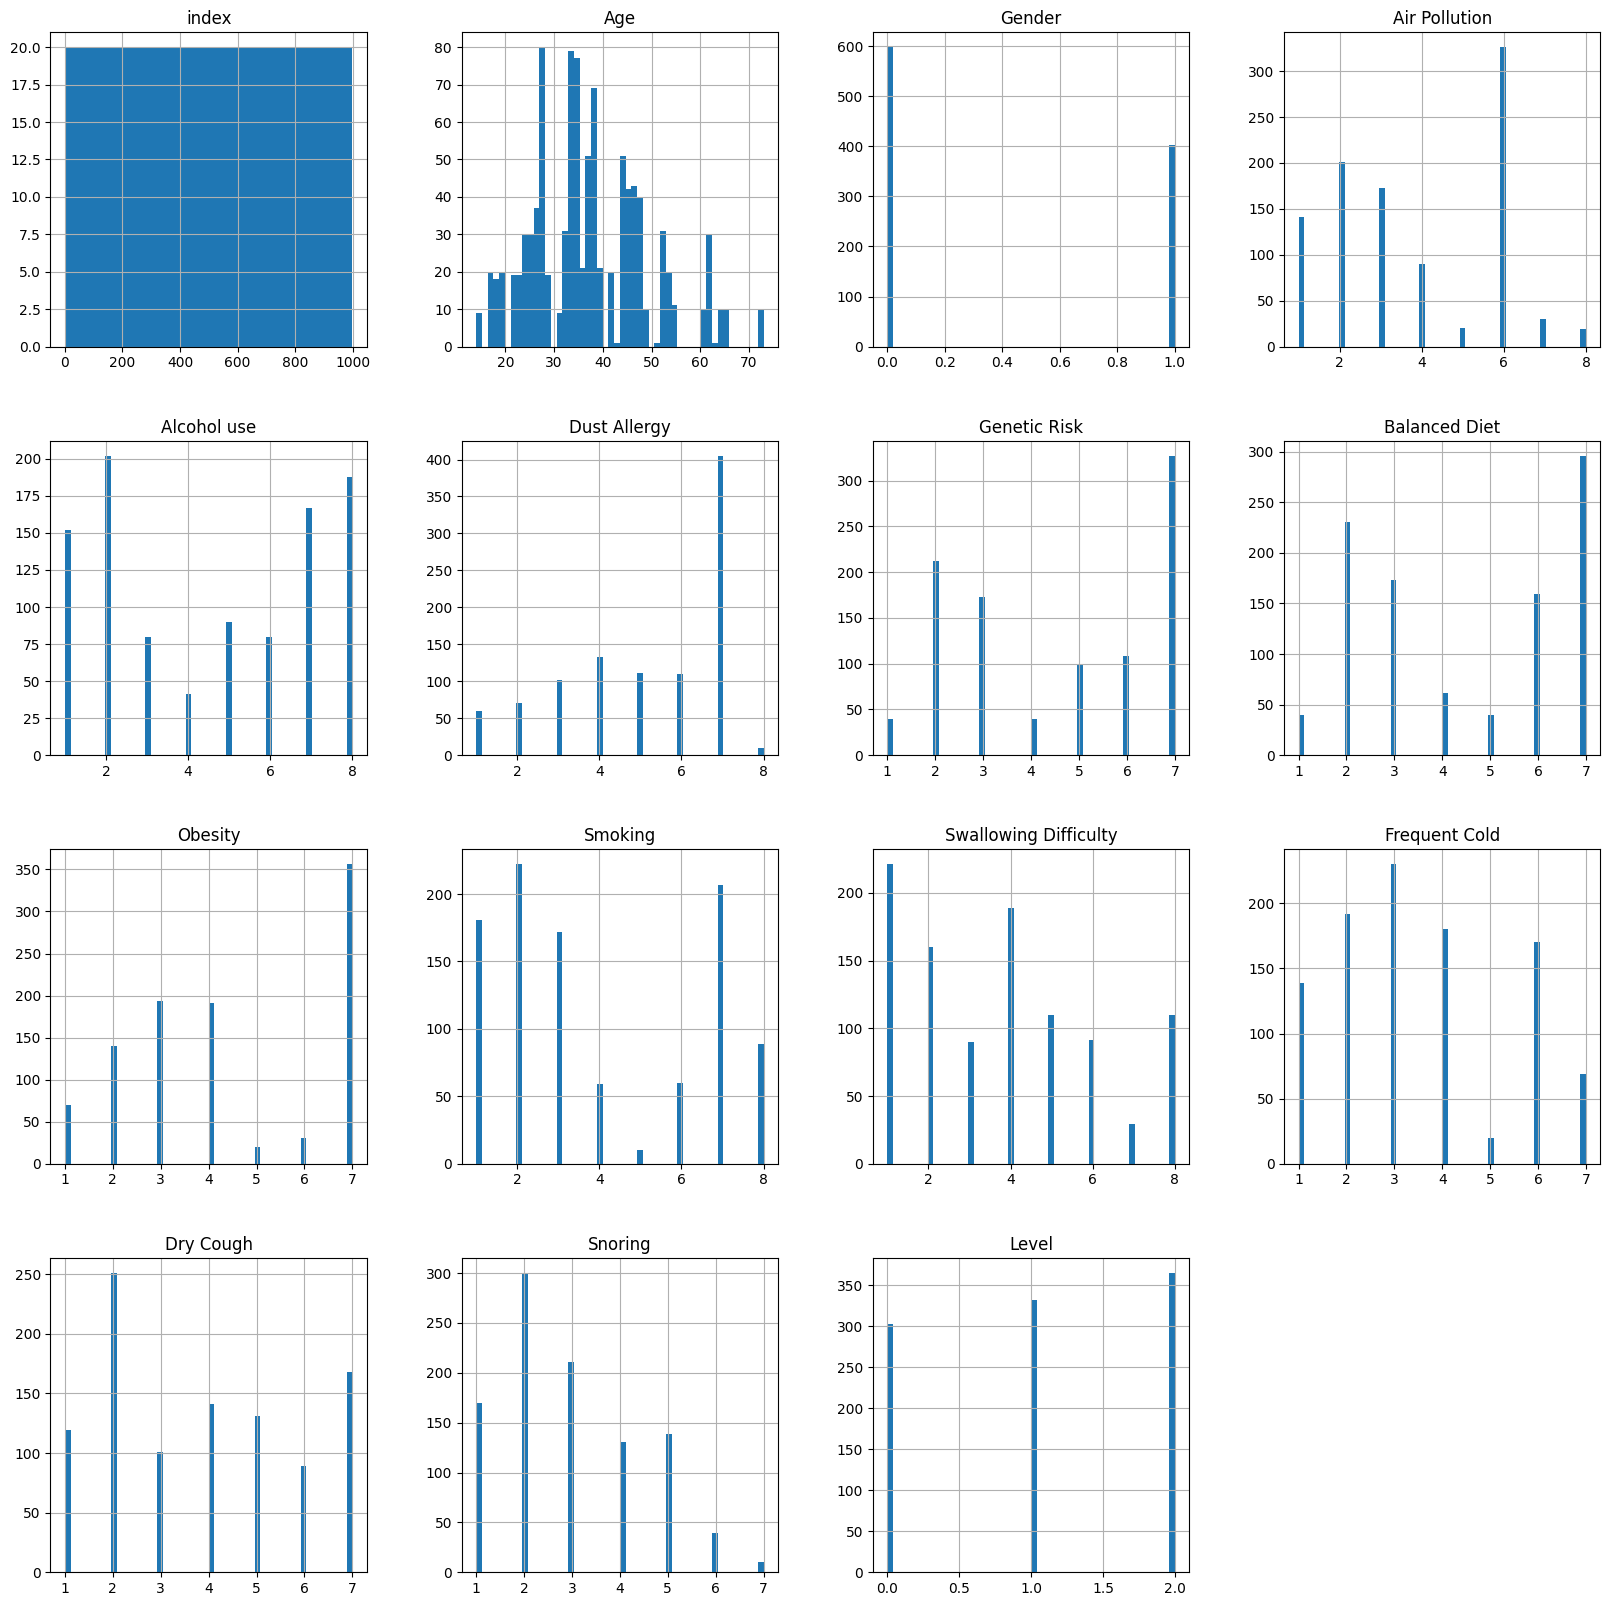

In [15]:
df.hist(bins=50, figsize=(20,20))

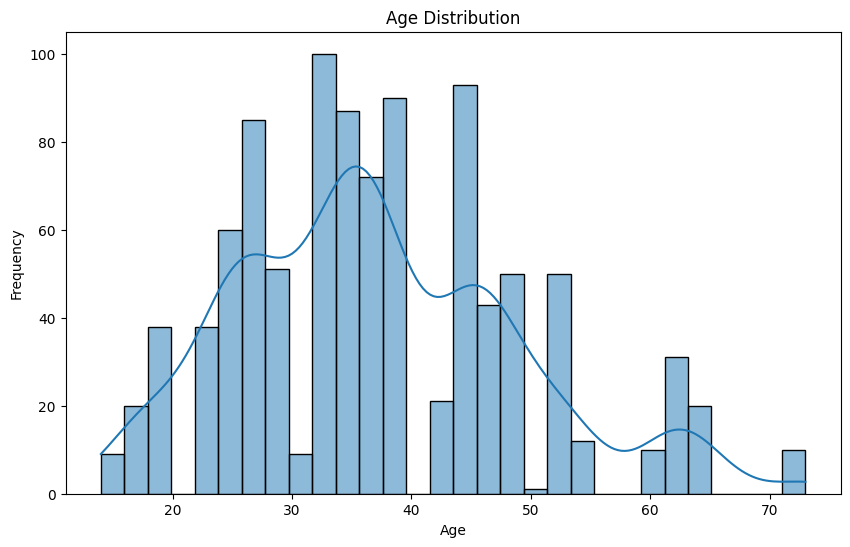

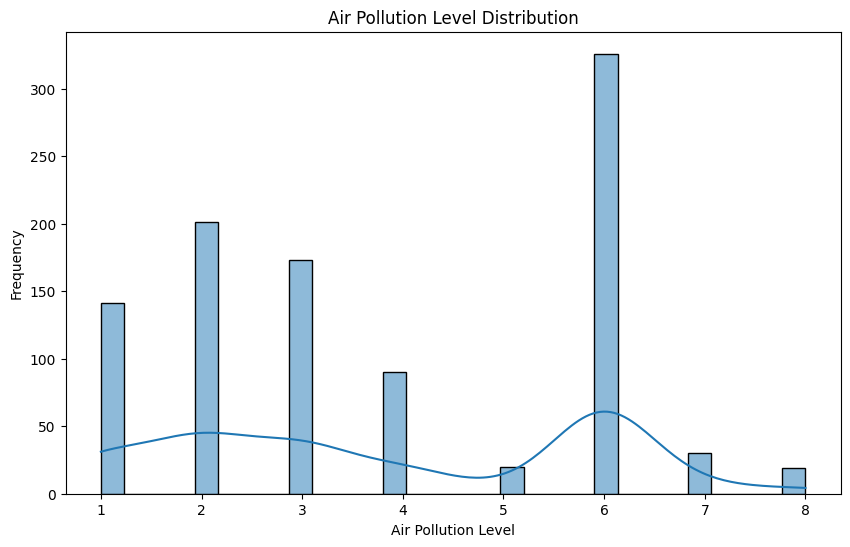

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of air pollution levels
plt.figure(figsize=(10, 6))
sns.histplot(df['Air Pollution'], kde=True, bins=30)
plt.title('Air Pollution Level Distribution')
plt.xlabel('Air Pollution Level')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Group the data by smoking status and count the occurrences of each status
smoking_counts = df['Smoking'].value_counts()
smoking_counts = df['Gender'].value_counts()

# Create a pie chart using plotly express
fig = px.pie(smoking_counts, values=smoking_counts.values, names=smoking_counts.index, title='Smoking Status Distribution')

# Show the pie chart
fig.show()


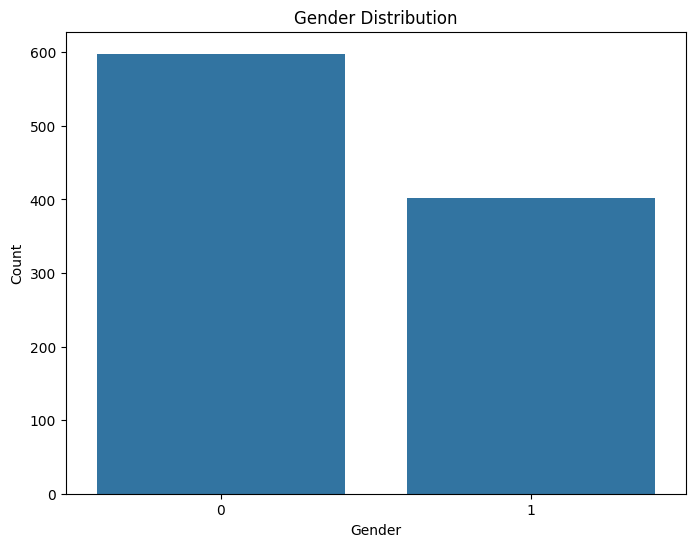

In [18]:
#Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

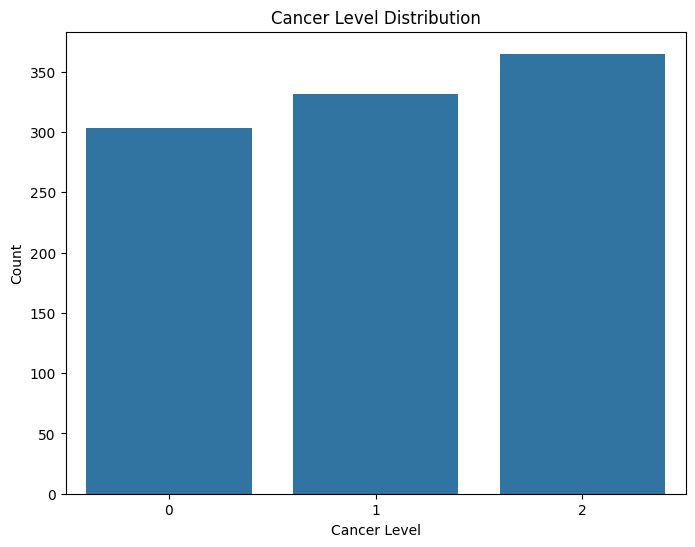

In [19]:
#Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', data=df)
plt.title('Cancer Level Distribution')
plt.xlabel('Cancer Level')
plt.ylabel('Count')
plt.show()

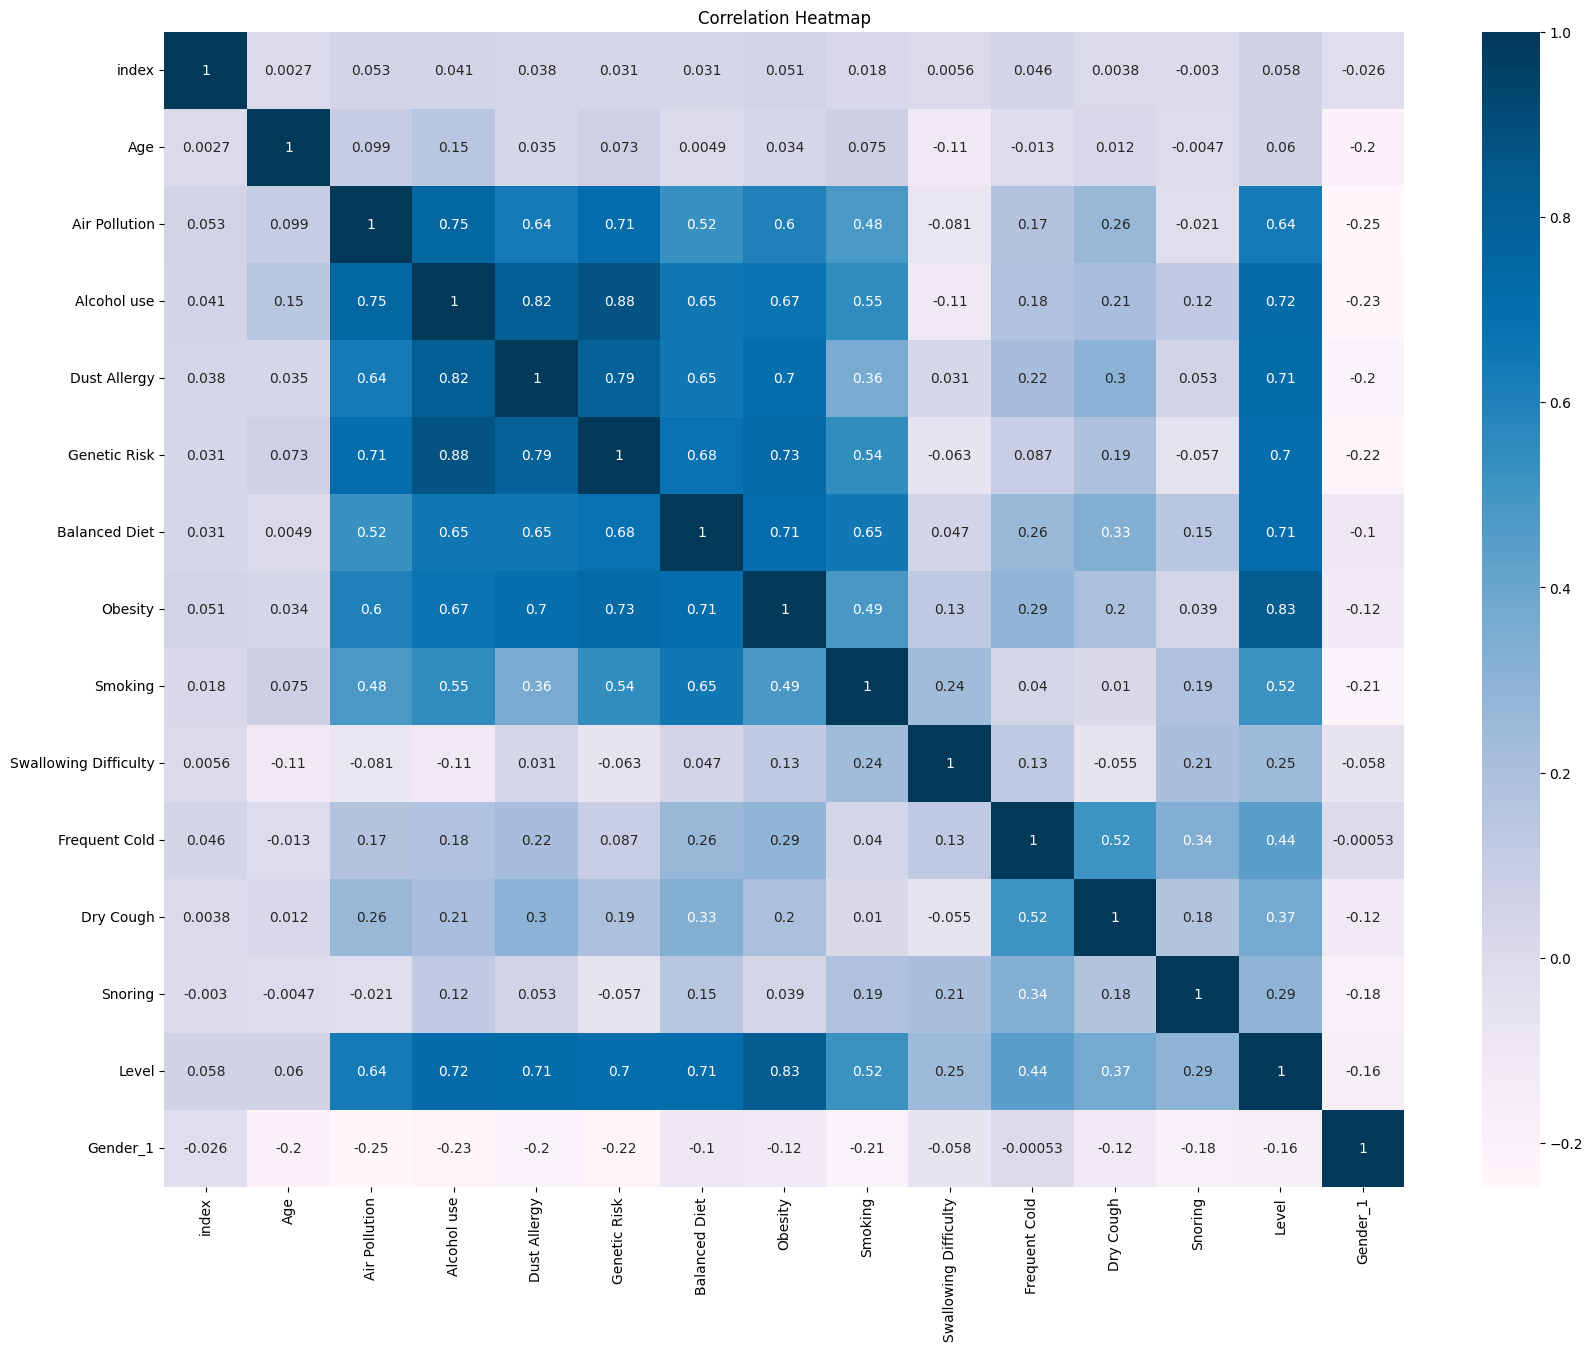

In [20]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

plt.figure(figsize=(20,15))
sns.heatmap(df_encoded.corr(), annot=True, cmap=plt.cm.PuBu)
plt.title('Correlation Heatmap')
plt.show()


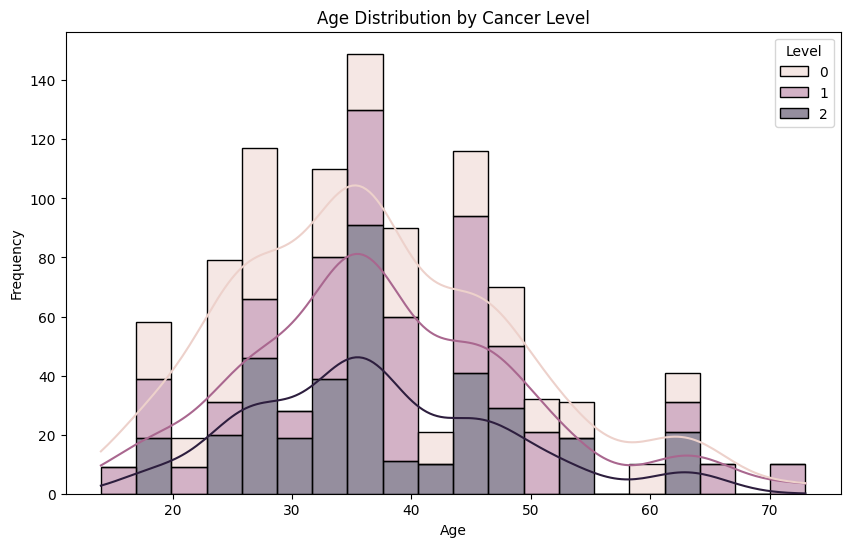

In [21]:
#Age distribution by level
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Level', multiple='stack', bins=20, kde=True)
plt.title('Age Distribution by Cancer Level')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

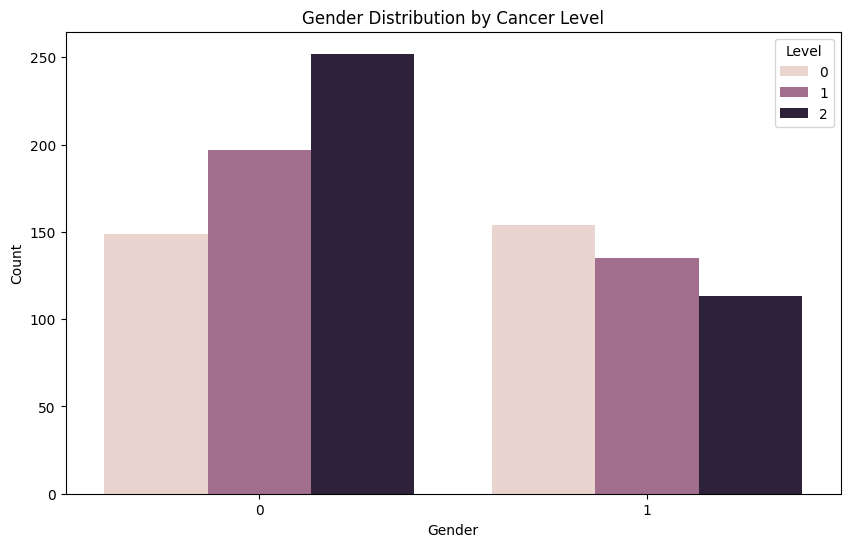

In [22]:
#gender distribution by level
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Level', data=df)
plt.title('Gender Distribution by Cancer Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Machine Learning Models**

In [44]:
#Drop the 'index' and 'Patient Id' columns
if 'index' in df.columns:
    df = df.drop(['index'], axis=1)
if 'Patient Id' in df.columns:
    df = df.drop(['Patient Id'], axis=1)
#Encode the 'Level' column
le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])

In [30]:
# Define features and target variable
X = df.drop('Level', axis=1)
y = df['Level']



In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Logistic Regression Accuracy: 0.98


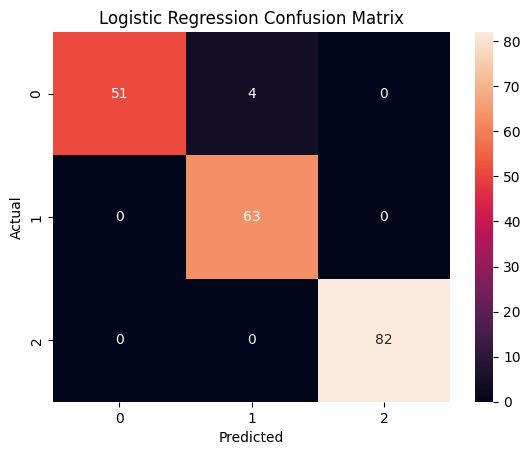

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.94      1.00      0.97        63
           2       1.00      1.00      1.00        82

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [45]:
# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))



Decision Tree Accuracy: 0.995


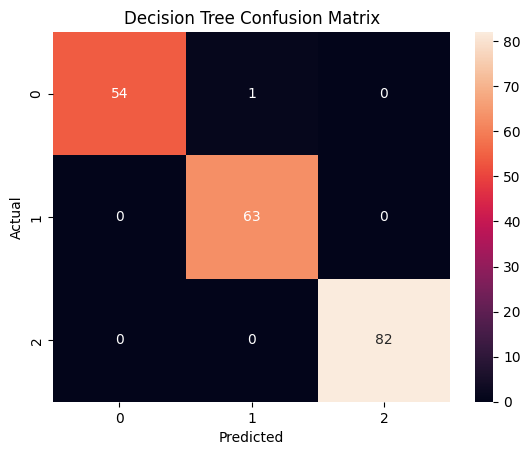

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        63
           2       1.00      1.00      1.00        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [46]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Evaluate Decision Tree
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree}")

conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dtree))

In [47]:
#Standardize the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train a Model
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [48]:

#Evaluation of the model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.98


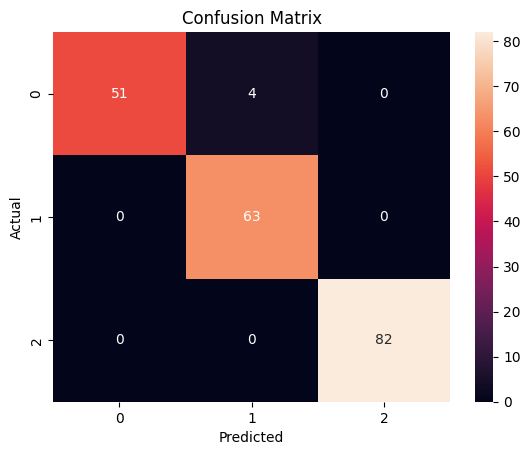

In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [37]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.94      1.00      0.97        63
           2       1.00      1.00      1.00        82

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [50]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


The Accuracy of Support Vector Machine is 100.0 %
